In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  

X = df.drop(columns=['target'])
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

                   Model  Accuracy   ROC-AUC
0  Decision Tree (Stump)  0.894737  0.897150
1               AdaBoost  0.964912  0.958074


C:\Users\kavip\AppData\Local\Temp\ipykernel_71396\3964043969.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison["Model"], y=comparison["Accuracy"], palette="coolwarm")


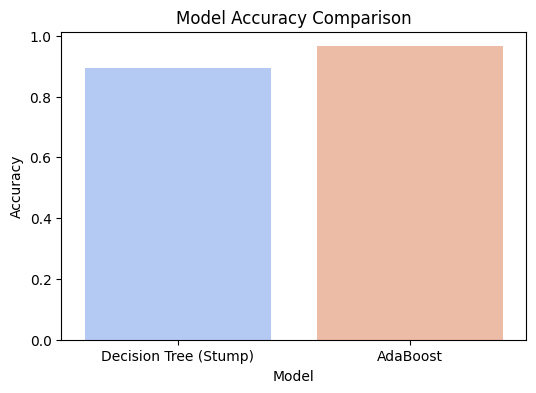

In [5]:
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)
auc_base = roc_auc_score(y_test, y_pred_base)

adaboost_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
auc_ada = roc_auc_score(y_test, y_pred_ada)

comparison = pd.DataFrame({
    "Model": ["Decision Tree (Stump)", "AdaBoost"],
    "Accuracy": [accuracy_base, accuracy_ada],
    "ROC-AUC": [auc_base, auc_ada]
})

print(comparison)

plt.figure(figsize=(6, 4))
sns.barplot(x=comparison["Model"], y=comparison["Accuracy"], palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()